<a href="https://colab.research.google.com/gist/andreazedda/402622b398200963258a07b9bdef9770/gradient-descent-teoria-ed-esempi-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent: Teoria ed Esempi Python
Questo notebook fornisce un'esplorazione del gradiente discendente, delle sue varianti, delle basi teoriche e di esempi di implementazioni pratiche.

## 1. Che cos'è il GD?
Il GD è un algoritmo di ottimizzazione utilizzato per minimizzare funzioni muovendosi iterativamente nella direzione della massima discesa, determinata dal gradiente negativo.

### Regola di Aggiornamento:
$$ \theta^{k+1} = \theta^k - \eta \nabla L(\theta^k) $$
- **$ \theta^k $**: Parametri all'iterazione $ k $.
- **$ \eta $**: Tasso di apprendimento, che controlla la dimensione degli step.
- **$ \nabla L(\theta^k) $**: Gradiente della loss function.

### Sfide nel GD
1. **Selezione del learnign rate:**
   - Un tasso troppo alto può causare divergenza o oscillazioni.
   - Un tasso troppo basso rallenta la convergenza.
2. **Minimi Locali e Punti Sella:**
   - In funzioni non convesse, l'algoritmo può convergere a punti subottimali.
3. **Gradienti Che Svaporano:**
   - Gradienti molto vicini a zero rallentano il processo di apprendimento.

Epoca 1: Theta = 0.6000, Perdita = 5.7600
Epoca 2: Theta = 1.0800, Perdita = 3.6864
Epoca 3: Theta = 1.4640, Perdita = 2.3593
Epoca 4: Theta = 1.7712, Perdita = 1.5099
Epoca 5: Theta = 2.0170, Perdita = 0.9664
Epoca 6: Theta = 2.2136, Perdita = 0.6185
Epoca 7: Theta = 2.3709, Perdita = 0.3958
Epoca 8: Theta = 2.4967, Perdita = 0.2533
Epoca 9: Theta = 2.5973, Perdita = 0.1621
Epoca 10: Theta = 2.6779, Perdita = 0.1038
Epoca 11: Theta = 2.7423, Perdita = 0.0664
Epoca 12: Theta = 2.7938, Perdita = 0.0425
Epoca 13: Theta = 2.8351, Perdita = 0.0272
Epoca 14: Theta = 2.8681, Perdita = 0.0174
Epoca 15: Theta = 2.8944, Perdita = 0.0111
Epoca 16: Theta = 2.9156, Perdita = 0.0071
Epoca 17: Theta = 2.9324, Perdita = 0.0046
Epoca 18: Theta = 2.9460, Perdita = 0.0029
Epoca 19: Theta = 2.9568, Perdita = 0.0019
Epoca 20: Theta = 2.9654, Perdita = 0.0012
Epoca 21: Theta = 2.9723, Perdita = 0.0008
Epoca 22: Theta = 2.9779, Perdita = 0.0005
Epoca 23: Theta = 2.9823, Perdita = 0.0003
Epoca 24: Theta = 2.

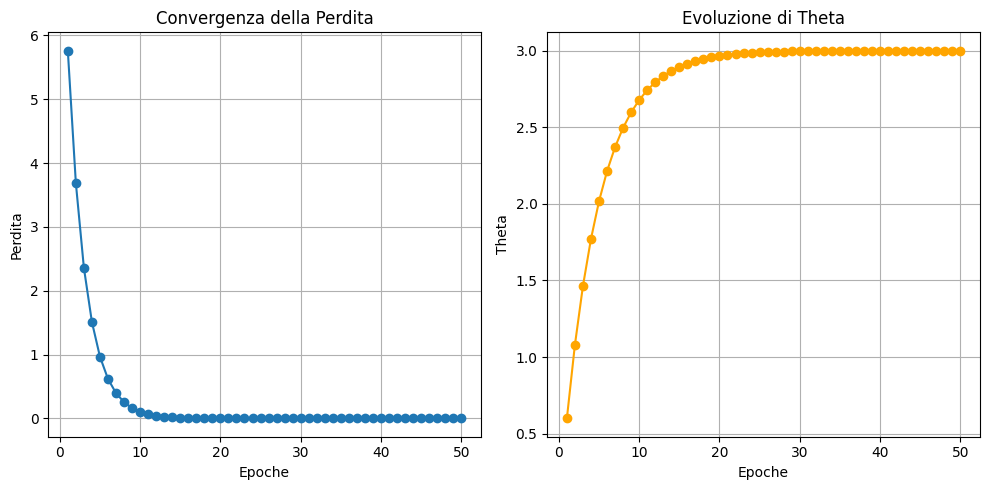

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione di perdita: L(theta) = (theta - 3)^2
def loss_function(theta):
    return (theta - 3)**2

# Gradiente della funzione di perdita
def gradient(theta):
    return 2 * (theta - 3)

# Parametri iniziali
theta = 0.0  # Valore iniziale di theta
learning_rate = 0.1  # Tasso di apprendimento
epochs = 50  # Numero di iterazioni

# Liste per tracciare i valori di theta e della perdita
theta_values = []
losses = []

# Gradient Descent
for epoch in range(epochs):
    grad = gradient(theta)  # Calcola il gradiente
    theta -= learning_rate * grad  # Aggiorna il parametro theta
    loss = loss_function(theta)  # Calcola la perdita
    theta_values.append(theta)  # Salva il valore di theta
    losses.append(loss)  # Salva la perdita
    print(f"Epoca {epoch+1}: Theta = {theta:.4f}, Perdita = {loss:.4f}")

# Visualizzazione della perdita nel tempo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Convergenza della Perdita")
plt.xlabel("Epoche")
plt.ylabel("Perdita")
plt.grid()

# Visualizzazione della traiettoria di theta
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), theta_values, marker='o', color='orange')
plt.title("Evoluzione di Theta")
plt.xlabel("Epoche")
plt.ylabel("Theta")
plt.grid()

plt.tight_layout()
plt.show()


## **2. Varianti del Gradient Descent**

### **2.1 Batch Gradient Descent**

Il **Batch Gradient Descent** calcola il gradiente della funzione di perdita $L(\theta)$ utilizzando **l'intero dataset** ad ogni iterazione. Questo approccio garantisce che ogni aggiornamento sia basato su una valutazione completa dei dati, rendendo il processo più stabile ma potenzialmente lento per dataset di grandi dimensioni.

- **Regola di Aggiornamento:**
$$
\theta^{k+1} = \theta^k - \eta \frac{1}{N} \sum_{i=1}^N \nabla L_i(\theta)
$$
  Dove:
  - $ \eta $: learning rate.
  - $ N $: numero totale di esempi nel dataset.
  - $ \nabla L_i(\theta) $: gradient della loss per il singolo esempio $ i $.

- **Vantaggi:**
  - Gli aggiornamenti sono **stabili** e **precisi** perché considerano l'intero dataset.
  - Ideale per problemi in cui la loss function è liscia (differenziabile) e il dataset è piccolo o di medie dimensioni.

- **Svantaggi:**
  - **High computational cost** per dataset di grandi dimensioni, poiché ogni iterazione richiede il calcolo del gradient su tutti i dati.
  - Non adatto a situazioni in cui i dati vengono aggiunti dinamicamente o in tempo reale.

- **Quando utilizzarlo:**
  - Quando si lavora con dataset relativamente **piccoli**.
  - Per applicazioni che richiedono alta precisione e stabilità nei gradient, ad esempio problemi di ottimizzazione su funzioni molto non lineari.


Epoca 1: Perdita = 10.0600, Theta = [0.55701737 2.01124609]
Epoca 2: Perdita = 6.6269, Theta = [0.9941862  2.44893808]
Epoca 3: Perdita = 4.4604, Theta = [1.34647929 2.79147683]
Epoca 4: Perdita = 3.0917, Theta = [1.63133204 3.05859268]
Epoca 5: Perdita = 2.2254, Theta = [1.86258097 3.26594023]
Epoca 6: Perdita = 1.6755, Theta = [2.05120684 3.42594   ]
Epoca 7: Perdita = 1.3251, Theta = [2.20592436 3.54844631]
Epoca 8: Perdita = 1.1005, Theta = [2.33365011 3.64127725]
Epoca 9: Perdita = 0.9551, Theta = [2.43987382 3.71063514]
Epoca 10: Perdita = 0.8597, Theta = [2.52895301 3.76144027]
Epoca 11: Perdita = 0.7960, Theta = [2.60434676 3.79759563]
Epoca 12: Perdita = 0.7524, Theta = [2.66880123 3.82219701]
Epoca 13: Perdita = 0.7214, Theta = [2.72449683 3.8376997 ]
Epoca 14: Perdita = 0.6987, Theta = [2.77316506 3.84605082]
Epoca 15: Perdita = 0.6811, Theta = [2.81618116 3.84879422]
Epoca 16: Perdita = 0.6670, Theta = [2.85463767 3.84715381]
Epoca 17: Perdita = 0.6551, Theta = [2.88940278 

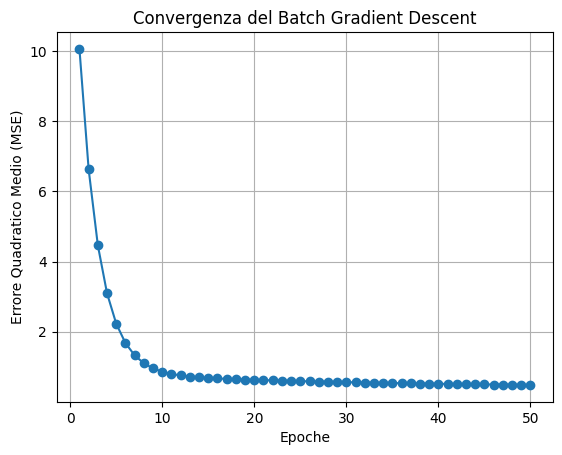

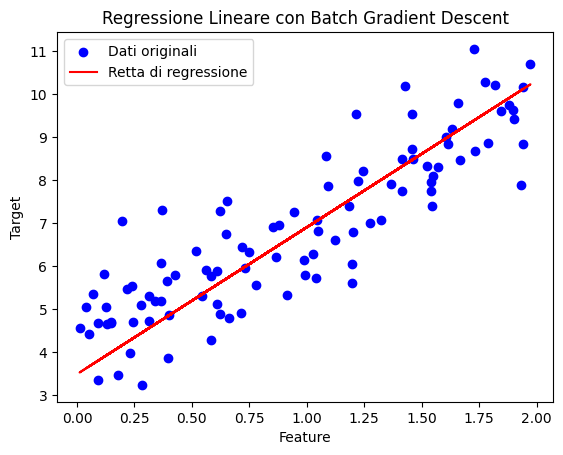

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generazione di un dataset fittizio
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 esempi, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Regressione lineare con rumore

# Funzione di perdita: errore quadratico medio
def loss_function(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Gradiente della funzione di perdita
def gradient(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / m) * X.T.dot(errors)

# Aggiunta del bias (colonna di 1) a X
X_b = np.c_[np.ones((100, 1)), X]  # Aggiunge x0 = 1 per il termine di bias

# Parametri iniziali
theta = np.random.randn(2, 1)  # Inizializzazione casuale dei parametri (bias e peso)
learning_rate = 0.1  # Tasso di apprendimento
epochs = 50  # Numero di iterazioni

# Lista per tracciare la perdita durante le epoche
losses = []

# Batch Gradient Descent
for epoch in range(epochs):
    grad = gradient(theta, X_b, y)  # Calcolo del gradiente su tutto il dataset
    theta -= learning_rate * grad  # Aggiornamento dei parametri
    loss = loss_function(theta, X_b, y)  # Calcolo della perdita
    losses.append(loss)  # Salvataggio della perdita corrente
    print(f"Epoca {epoch+1}: Perdita = {loss:.4f}, Theta = {theta.ravel()}")

# Visualizzazione della perdita durante le epoche
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Convergenza del Batch Gradient Descent")
plt.xlabel("Epoche")
plt.ylabel("Errore Quadratico Medio (MSE)")
plt.grid()
plt.show()

# Visualizzazione della retta di regressione
plt.scatter(X, y, color='blue', label="Dati originali")
plt.plot(X, X_b.dot(theta), color='red', label="Retta di regressione")
plt.title("Regressione Lineare con Batch Gradient Descent")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


### **2.2 Stochastic Gradient Descent (SGD)**

Il **Stochastic Gradient Descent** calcola il gradient della funzione di perdita $L(\theta)$ utilizzando **un singolo esempio** del dataset per ogni iterazione. Questo approccio rende l'ottimizzazione più veloce ma introduce rumore negli aggiornamenti.

- **Regola di Aggiornamento:**
$$
\theta^{k+1} = \theta^k - \eta \nabla L_i(\theta)
$$
  Dove:
  - $ \eta $: learning rate.
  - $ \nabla L_i(\theta) $: gradient della loss per il singolo esempio $ i $.

- **Vantaggi:**
  - Aggiornamenti veloci.
  - Adatto a **large datasets**.

- **Svantaggi:**
  - Aggiornamenti rumorosi che possono causare oscillazioni.
  - Meno precisione rispetto al **Batch Gradient Descent**.


Epoca 1: Perdita = 0.9727, Theta = [4.39909935 2.98604217]
Epoca 2: Perdita = 0.9924, Theta = [4.32501068 2.3021165 ]
Epoca 3: Perdita = 0.8076, Theta = [4.16222415 2.82437944]
Epoca 4: Perdita = 1.0045, Theta = [3.62636927 2.93448896]
Epoca 5: Perdita = 0.8385, Theta = [4.20852681 2.61429209]
Epoca 6: Perdita = 0.8230, Theta = [4.07591351 2.97000163]
Epoca 7: Perdita = 0.8685, Theta = [3.96423758 2.77225251]
Epoca 8: Perdita = 0.9568, Theta = [4.22468464 2.41401176]
Epoca 9: Perdita = 0.8416, Theta = [4.4846065  2.67269005]
Epoca 10: Perdita = 0.8755, Theta = [4.37299395 2.42605672]
Epoca 11: Perdita = 1.1104, Theta = [4.13955819 3.32237307]
Epoca 12: Perdita = 1.3190, Theta = [3.34242719 2.94490194]
Epoca 13: Perdita = 0.8940, Theta = [4.41715466 2.86403834]
Epoca 14: Perdita = 0.8760, Theta = [3.99003384 2.73037713]
Epoca 15: Perdita = 0.9841, Theta = [3.82679538 2.73552541]
Epoca 16: Perdita = 0.8185, Theta = [4.05312629 2.95395497]
Epoca 17: Perdita = 1.4199, Theta = [3.92541458 2

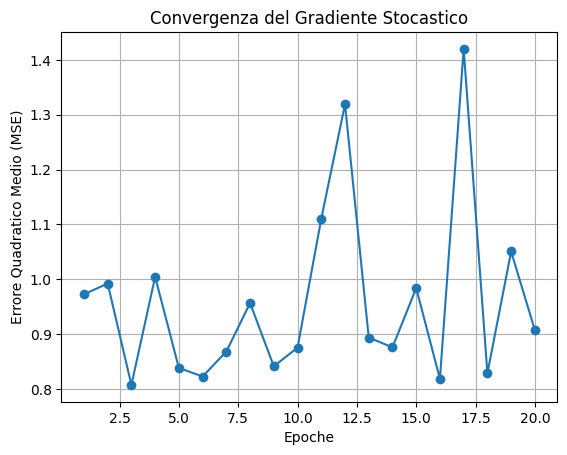

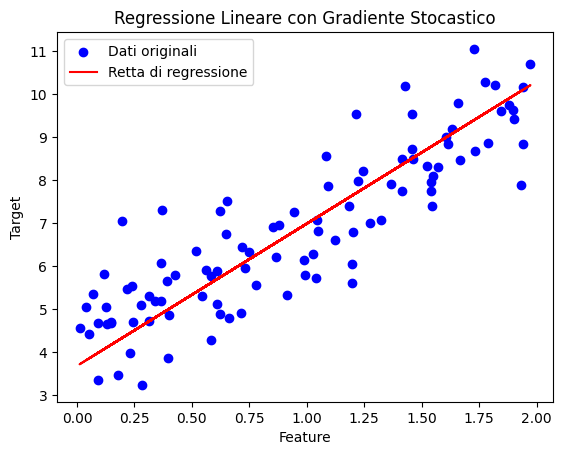

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generazione di un dataset fittizio
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 esempi, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Regressione lineare con rumore

# Aggiunta del bias (colonna di 1) a X
X_b = np.c_[np.ones((100, 1)), X]  # Aggiunge x0 = 1 per il termine di bias

# Parametri iniziali
theta = np.random.randn(2, 1)  # Inizializzazione casuale dei parametri (bias e peso)
learning_rate = 0.1  # Tasso di apprendimento
epochs = 20  # Numero di epoche

# Lista per tracciare la perdita durante le iterazioni
losses = []

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X_b)):  # Itera su ogni esempio nel dataset
        random_index = np.random.randint(len(X_b))  # Campiona un esempio casuale
        xi = X_b[random_index:random_index + 1]  # Estrae la riga del dataset
        yi = y[random_index:random_index + 1]  # Estrae il valore target corrispondente
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Calcola il gradiente per il singolo esempio
        theta -= learning_rate * gradients  # Aggiorna i parametri
    # Calcolo della perdita totale al termine di ogni epoca
    loss = (1 / len(X_b)) * np.sum((X_b.dot(theta) - y) ** 2)
    losses.append(loss)
    print(f"Epoca {epoch+1}: Perdita = {loss:.4f}, Theta = {theta.ravel()}")

# Visualizzazione della perdita durante le epoche
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Convergenza del Gradiente Stocastico")
plt.xlabel("Epoche")
plt.ylabel("Errore Quadratico Medio (MSE)")
plt.grid()
plt.show()

# Visualizzazione della retta di regressione
plt.scatter(X, y, color='blue', label="Dati originali")
plt.plot(X, X_b.dot(theta), color='red', label="Retta di regressione")
plt.title("Regressione Lineare con Gradiente Stocastico")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


### **2.3 Mini-Batch Gradient Descent**

Il **Mini-Batch Gradient Descent** calcola il gradient della funzione di perdita $L(\theta)$ utilizzando **sottoinsiemi (mini-batch)** del dataset ad ogni iterazione. Questo approccio combina i vantaggi del **Batch Gradient Descent** e dello **Stochastic Gradient Descent**.

- **Regola di Aggiornamento:**
$$
\theta^{k+1} = \theta^k - \eta \frac{1}{K} \sum_{i \in \text{mini-batch}} \nabla L_i(\theta)
$$
  Dove:
  - $ \eta $: learning rate.
  - $ K $: numero di esempi nel mini-batch.
  - $ \nabla L_i(\theta) $: gradient della loss per il singolo esempio $ i $.

- **Vantaggi:**
  - Compromesso tra stabilità ed efficienza.
  - Aggiornamenti più veloci rispetto al **Batch Gradient Descent** e meno rumorosi rispetto allo **Stochastic Gradient Descent**.

- **Svantaggi:**
  - Richiede tuning della dimensione del batch.
  - Dipendenza dalle dimensioni del mini-batch per la convergenza.


Epoca 1: Perdita = 1.6604, Theta = [2.54518346 3.81717779]
Epoca 2: Perdita = 1.2644, Theta = [2.97570827 3.84689205]
Epoca 3: Perdita = 1.1305, Theta = [3.18490305 3.69009694]
Epoca 4: Perdita = 1.0369, Theta = [3.34333626 3.54270001]
Epoca 5: Perdita = 0.9753, Theta = [3.51256828 3.45730495]
Epoca 6: Perdita = 0.9268, Theta = [3.56490723 3.28012515]
Epoca 7: Perdita = 0.8901, Theta = [3.67495674 3.20550566]
Epoca 8: Perdita = 0.8756, Theta = [3.72915011 3.09957052]
Epoca 9: Perdita = 0.8469, Theta = [3.85577751 3.09797752]
Epoca 10: Perdita = 0.8364, Theta = [3.89115567 3.02450574]
Epoca 11: Perdita = 0.8278, Theta = [3.94162312 2.98378593]
Epoca 12: Perdita = 0.8208, Theta = [3.99832305 2.96113419]
Epoca 13: Perdita = 0.8413, Theta = [3.95887516 2.85111171]
Epoca 14: Perdita = 0.8156, Theta = [4.08223345 2.92792576]
Epoca 15: Perdita = 0.8179, Theta = [4.05009875 2.84223822]
Epoca 16: Perdita = 0.8109, Theta = [4.09540169 2.84695325]
Epoca 17: Perdita = 0.8163, Theta = [4.16550913 2

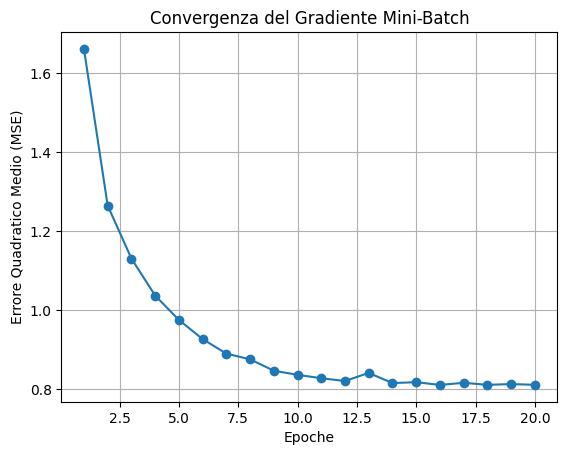

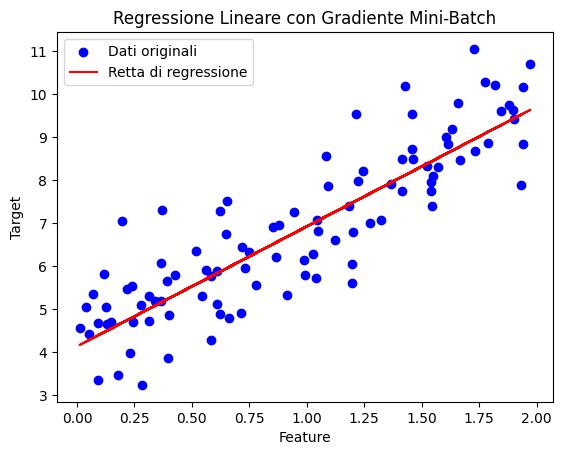

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generazione di un dataset fittizio
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 esempi, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Regressione lineare con rumore

# Aggiunta del bias (colonna di 1) a X
X_b = np.c_[np.ones((100, 1)), X]  # Aggiunge x0 = 1 per il termine di bias

# Parametri iniziali
theta = np.random.randn(2, 1)  # Inizializzazione casuale dei parametri (bias e peso)
learning_rate = 0.1  # Tasso di apprendimento
epochs = 20  # Numero di epoche
batch_size = 20  # Dimensione del mini-batch

# Lista per tracciare la perdita durante le epoche
losses = []

# Funzione per dividere i dati in mini-batch
def create_mini_batches(X, y, batch_size):
    indices = np.random.permutation(len(X))  # Shuffling degli indici
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    for i in range(0, len(X), batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        y_batch = y_shuffled[i:i + batch_size]
        yield X_batch, y_batch

# Mini-Batch Gradient Descent
for epoch in range(epochs):
    for X_batch, y_batch in create_mini_batches(X_b, y, batch_size):
        gradients = (2 / len(X_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)  # Gradiente su mini-batch
        theta -= learning_rate * gradients  # Aggiornamento dei parametri
    # Calcolo della perdita totale al termine di ogni epoca
    loss = (1 / len(X_b)) * np.sum((X_b.dot(theta) - y) ** 2)
    losses.append(loss)
    print(f"Epoca {epoch+1}: Perdita = {loss:.4f}, Theta = {theta.ravel()}")

# Visualizzazione della perdita durante le epoche
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Convergenza del Gradiente Mini-Batch")
plt.xlabel("Epoche")
plt.ylabel("Errore Quadratico Medio (MSE)")
plt.grid()
plt.show()

# Visualizzazione della retta di regressione
plt.scatter(X, y, color='blue', label="Dati originali")
plt.plot(X, X_b.dot(theta), color='red', label="Retta di regressione")
plt.title("Regressione Lineare con Gradiente Mini-Batch")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


## **3. Learning Rate Decay**

Il **Learning Rate Decay** (decadenza del tasso di apprendimento) è una tecnica che consiste nel ridurre dinamicamente il learning rate $ \eta $ durante le iterazioni del Gradient Descent. Questo approccio aiuta a bilanciare la velocità iniziale di apprendimento e la stabilità della convergenza verso il minimo ottimale.

### **Motivazioni**
- **Velocità iniziale:** All'inizio, un tasso di apprendimento elevato ($ \eta $) consente di fare grandi progressi verso il minimo globale, riducendo rapidamente la perdita.
- **Precisione finale:** Man mano che ci si avvicina al minimo, un tasso di apprendimento più piccolo evita oscillazioni e consente aggiornamenti più fini.

### **Obiettivi della Decadenza**
1. Evitare che l'algoritmo superi il minimo a causa di un tasso troppo elevato.
2. Accelerare il processo di apprendimento nelle fasi iniziali.
3. Garantire una convergenza stabile e precisa verso il minimo ottimale.

### **Condizioni per la Decadenza**
Per garantire che l'algoritmo converga in modo stabile, il tasso di apprendimento deve rispettare le seguenti condizioni:
$$
\sum_k \eta_k^2 < \infty \quad \text{e} \quad \sum_k \eta_k = \infty
$$
- **Interpretazione:**
  - $ \sum_k \eta_k^2 < \infty $: Assicura che gli aggiornamenti diventino sempre più piccoli nel tempo, stabilizzando il processo.
  - $ \sum_k \eta_k = \infty $: Garantisce che l'algoritmo esplori completamente il dominio della funzione di perdita.

### **Strategie Comuni di Decadenza**
1. **Decadenza Lineare:** Il learning rate diminuisce linearmente con le iterazioni.
   $$
   \eta_k = \eta_0 \cdot (1 - \alpha \cdot k)
   $$
   - Dove $ \alpha $ è il tasso di decadenza.

2. **Decadenza Inversa:** Il learning rate si riduce secondo una funzione razionale.
   $$
   \eta_k = \frac{\eta_0}{1 + \lambda \cdot k}
   $$
   - Dove $ \lambda $ controlla la velocità di decadenza.

3. **Esponenziale:** Il learning rate diminuisce esponenzialmente.
   $$
   \eta_k = \eta_0 \cdot e^{-\lambda \cdot k}
   $$
   - Dove $ \lambda $ è il tasso di decadimento esponenziale.

4. **Step Decay:** Il learning rate diminuisce di un fattore fisso ogni $ n $ iterazioni.
   $$
   \eta_k = \eta_0 \cdot \gamma^{\lfloor k / n \rfloor}
   $$
   - Dove $ \gamma $ è il fattore di decadenza e $ n $ il numero di iterazioni.

### **Applicazioni**
La decadenza del tasso di apprendimento è particolarmente utile in:
- **Reti neurali profonde:** Aiuta a stabilizzare la convergenza durante l'addestramento.
- **Problemi complessi:** Dove il minimo della funzione di perdita è difficile da trovare a causa di oscillazioni o rumore nei dati.
- **Dataset dinamici:** Dove il dataset cambia nel tempo, rendendo necessario un adattamento continuo del learning rate.


Epoca 1: Tasso = 0.1000, Theta = 0.6000, Perdita = 5.7600
Epoca 2: Tasso = 0.0952, Theta = 1.0571, Perdita = 3.7747
Epoca 3: Tasso = 0.0909, Theta = 1.4104, Perdita = 2.5269
Epoca 4: Tasso = 0.0870, Theta = 1.6868, Perdita = 1.7244
Epoca 5: Tasso = 0.0833, Theta = 1.9057, Perdita = 1.1975
Epoca 6: Tasso = 0.0800, Theta = 2.0808, Perdita = 0.8449
Epoca 7: Tasso = 0.0769, Theta = 2.2222, Perdita = 0.6050
Epoca 8: Tasso = 0.0741, Theta = 2.3374, Perdita = 0.4390
Epoca 9: Tasso = 0.0714, Theta = 2.4321, Perdita = 0.3225
Epoca 10: Tasso = 0.0690, Theta = 2.5104, Perdita = 0.2397
Epoca 11: Tasso = 0.0667, Theta = 2.5757, Perdita = 0.1800
Epoca 12: Tasso = 0.0645, Theta = 2.6304, Perdita = 0.1366
Epoca 13: Tasso = 0.0625, Theta = 2.6766, Perdita = 0.1046
Epoca 14: Tasso = 0.0606, Theta = 2.7158, Perdita = 0.0807
Epoca 15: Tasso = 0.0588, Theta = 2.7493, Perdita = 0.0629
Epoca 16: Tasso = 0.0571, Theta = 2.7779, Perdita = 0.0493
Epoca 17: Tasso = 0.0556, Theta = 2.8026, Perdita = 0.0390
Epoca 

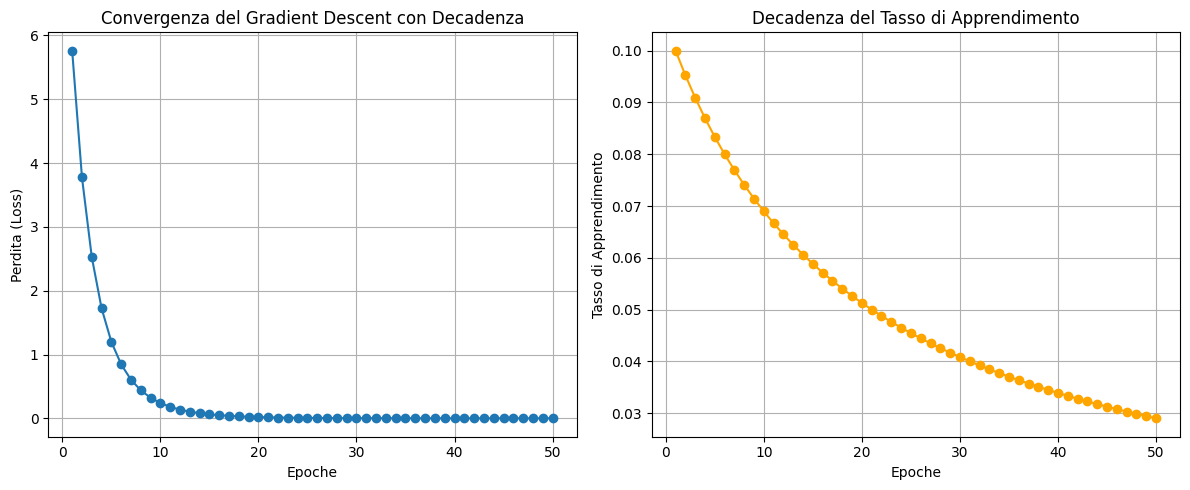

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione di perdita: L(theta) = (theta - 3)^2
def loss_function(theta):
    return (theta - 3)**2

# Gradiente della funzione di perdita
def gradient(theta):
    return 2 * (theta - 3)

# Parametri iniziali
theta = 0.0  # Valore iniziale di theta
initial_learning_rate = 0.1  # Tasso di apprendimento iniziale
epochs = 50  # Numero di iterazioni

# Strategie di decadenza del tasso di apprendimento
def learning_rate_decay(epoch, initial_rate, decay_rate):
    """Decadenza del tasso di apprendimento: ogni epoca riduce il tasso"""
    return initial_rate / (1 + decay_rate * epoch)

# Liste per tracciare la perdita e il tasso di apprendimento
losses = []
learning_rates = []

# Gradient Descent con Decadenza del Tasso di Apprendimento
decay_rate = 0.05  # Fattore di decadenza
for epoch in range(epochs):
    lr = learning_rate_decay(epoch, initial_learning_rate, decay_rate)  # Calcola il tasso corrente
    grad = gradient(theta)  # Calcolo del gradiente
    theta -= lr * grad  # Aggiorna theta
    loss = loss_function(theta)  # Calcola la perdita
    losses.append(loss)  # Salva la perdita
    learning_rates.append(lr)  # Salva il tasso di apprendimento
    print(f"Epoca {epoch+1}: Tasso = {lr:.4f}, Theta = {theta:.4f}, Perdita = {loss:.4f}")

# Visualizzazione della perdita nel tempo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Convergenza del Gradient Descent con Decadenza")
plt.xlabel("Epoche")
plt.ylabel("Perdita (Loss)")
plt.grid()

# Visualizzazione della decadenza del tasso di apprendimento
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), learning_rates, marker='o', color='orange')
plt.title("Decadenza del Tasso di Apprendimento")
plt.xlabel("Epoche")
plt.ylabel("Tasso di Apprendimento")
plt.grid()

plt.tight_layout()
plt.show()


## **4. Confronto delle Varianti del Gradient Descent**

| Variante                | Speed            | Stability        | Computational Cost  |
|-------------------------|------------------|------------------|---------------------|
| Batch Gradient Descent  | Lenta            | Alta             | Alto                |
| Stochastic Gradient Descent (SGD) | Veloce           | Bassa            | Basso               |
| Mini-Batch Gradient Descent | Moderata         | Moderata         | Moderato            |

### **Analisi del Confronto**
- **Batch Gradient Descent:**
  - Utilizza l'intero dataset ad ogni iterazione per calcolare il gradient.
  - Ideale per dataset piccoli o medi, garantendo aggiornamenti **stabili** e precisi.
  - Ha un **alto computational cost**, poiché analizza tutti i dati per ogni aggiornamento.

- **Stochastic Gradient Descent (SGD):**
  - Utilizza un singolo esempio per calcolare il gradient, rendendo gli aggiornamenti **veloci** ma **rumorosi**.
  - È più adatto per **large datasets**, poiché l'aggiornamento è molto efficiente.
  - La **bassa stabilità** può portare ad oscillazioni, ma favorisce l'esplorazione di minimi locali.

- **Mini-Batch Gradient Descent:**
  - Calcola il gradient su un **sottoinsieme (mini-batch)** del dataset, bilanciando velocità e stabilità.
  - È una soluzione di compromesso, con un **moderato computational cost**.
  - Ideale per applicazioni reali come l'addestramento di reti neurali, dove è necessario bilanciare efficienza e precisione.
